# Replikacija rezultata

## Predobrada podataka

In [282]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score, auc, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



### Učitavanje podataka

In [283]:
# Učitavanje podataka
df = pd.read_csv("data/heart_disease_uci.csv")

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [285]:
# Opis numeričkih podataka, broj podataka, standardna devijacija, aritmetička vrijednost, minimalne i maksimalne vrijednosti
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [286]:
# Opis svih podataka, broj podataka, standardna devijacija, aritmetička vrijednost, minimalne i maksimalne vrijednosti
df.describe(include = 'all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


#### Monotoni atributi

In [287]:
# Provjera postoje li monotoni atributi, čija vrijednost jednoliko raste
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [288]:
# Izbacivanje monotonog atributa - id
df.drop('id', axis = 1, inplace=True)

In [289]:
df.drop('dataset', axis = 1, inplace=True)

#### Nedostajajući podaci

In [290]:
# Provjera koliko je nedostajajućih podataka
df.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [291]:
# Postotak nedostajajućih vrijednosti
round((df.isna().sum() / len(df))*100,2)

age          0.00
sex          0.00
cp           0.00
trestbps     6.41
chol         3.26
fbs          9.78
restecg      0.22
thalch       5.98
exang        5.98
oldpeak      6.74
slope       33.59
ca          66.41
thal        52.83
num          0.00
dtype: float64

In [292]:
df.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,726,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,53.510870,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,9.424685,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,28.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


S obzirom da su u članku nedostajajuće vrijednosti popunjene k-nn imputacijom, prije toga je potrebno napraviti label encoding za varijable koje nisu numeričke budući da knn može raditi samo s numeričkim varijablama.

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


Label encoding na svim odgovarajućim značajkama.

In [294]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

label_encoder = LabelEncoder()
for feature in categorical_features:
    df = df[df[feature].notnull()]
    df[feature] = label_encoder.fit_transform(df[feature])



In [295]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,372.000000,372.000000,372.000000,371.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,299.000000,372.000000,372.000000
mean,54.774194,0.723118,0.854839,132.137466,214.889785,0.139785,0.647849,143.556452,0.395161,1.015054,1.336022,0.672241,1.354839,1.088710
std,9.030800,0.448060,1.017583,17.930797,97.522635,0.347231,0.593923,26.099014,0.489544,1.116955,0.607672,0.937438,0.621192,1.243931
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,233.000000,0.000000,1.000000,146.500000,0.000000,0.800000,1.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,4.000000


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 903
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       372 non-null    int64  
 1   sex       372 non-null    int64  
 2   cp        372 non-null    int64  
 3   trestbps  371 non-null    float64
 4   chol      372 non-null    float64
 5   fbs       372 non-null    int64  
 6   restecg   372 non-null    int64  
 7   thalch    372 non-null    float64
 8   exang     372 non-null    int64  
 9   oldpeak   372 non-null    float64
 10  slope     372 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      372 non-null    int64  
 13  num       372 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 43.6 KB


Ispunjavanje nedostajajućih vrijednosti k-nn imputerom.

In [297]:
cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

knn = KNNImputer(n_neighbors=5)

imputed_data = knn.fit_transform(df[cols])
df[cols] = imputed_data


In [298]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [299]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,54.774194,0.723118,0.854839,132.110215,214.889785,0.139785,0.647849,143.556452,0.395161,1.015054,1.336022,0.732258,1.354839,1.088710
std,9.030800,0.448060,1.017583,17.914328,97.522635,0.347231,0.593923,26.099014,0.489544,1.116955,0.607672,0.858214,0.621192,1.243931
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,233.000000,0.000000,1.000000,146.500000,0.000000,0.800000,1.000000,0.900000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,4.000000


Članak kaže da outlieri ne postoje. 

U članku je izlazna oznaka zapravo binarna klasifikacija, dok je u našim podacima izlazna oznaka višeklasna. Stoga, to trebamo prepraviti u binarnu klasifikaciju npr. pristupom OVR ili OVO. 

In [300]:
# Funkcija za pretvorbu oznaka u binarnu klasifikaciju
def convert_to_binary(label):
    if label < 2:
        return 0
    else:
        return 1

# Stvaranje novog stupca 'target' s binarnim oznakama
df['target'] = df['num'].apply(convert_to_binary)

# Izbrisati izvorni stupac 'num' 
df.drop('num', axis=1, inplace=True)


In [301]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,54.774194,0.723118,0.854839,132.110215,214.889785,0.139785,0.647849,143.556452,0.395161,1.015054,1.336022,0.732258,1.354839,0.319892
std,9.030800,0.448060,1.017583,17.914328,97.522635,0.347231,0.593923,26.099014,0.489544,1.116955,0.607672,0.858214,0.621192,0.467063
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,233.000000,0.000000,1.000000,146.500000,0.000000,0.800000,1.000000,0.900000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Sada možemo provesti standardizaciju da osiguramo da su sve značajke na istoj skali i da nam neke ne utječu više od drugih na klasifikaciju. 

In [302]:
X = df.drop('target', axis = 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=1/7.0, random_state=0)

In [303]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Treniranje modela

### Decision Tree

In [304]:
dt = DecisionTreeClassifier()
dt_y_pred = cross_val_predict(dt, X,  y, cv=10)

print(classification_report(y, dt_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       253
           1       0.56      0.55      0.55       119

    accuracy                           0.72       372
   macro avg       0.67      0.67      0.67       372
weighted avg       0.72      0.72      0.72       372



In [305]:
# Instanciranje Decision Tree klasifikatora
decision_tree = DecisionTreeClassifier()

# Treniranje modela
decision_tree.fit(X_train, y_train)

# Predviđanje na testnom skupu
dt_h = decision_tree.predict(X_test)

# Evaluacija modela
dt_h_accuracy = accuracy_score(y_test, dt_h)
print(f"Točnost modela: {dt_h_accuracy:.2f}")

print(classification_report(y_test, dt_h))

Točnost modela: 0.80
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.67      0.71      0.69        17

    accuracy                           0.80        54
   macro avg       0.76      0.77      0.77        54
weighted avg       0.80      0.80      0.80        54



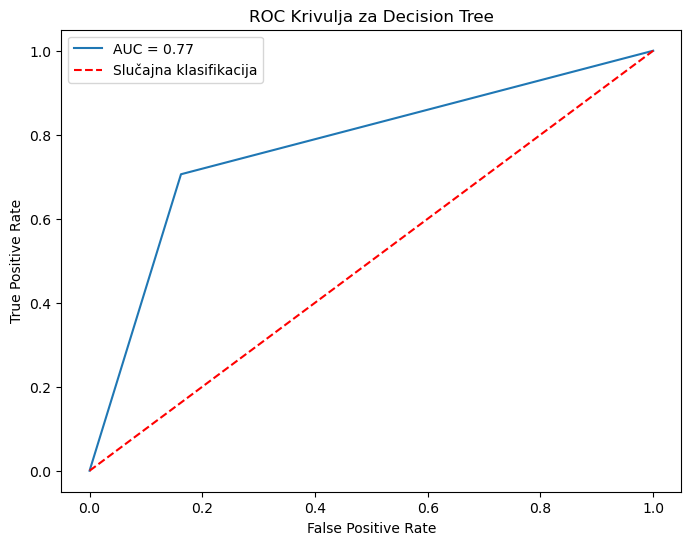

In [306]:
# Predviđanja vjerojatnosti pripadnosti pozitivnom razredu (klasi 1)
dt_y_proba = decision_tree.predict_proba(X_test)[:, 1]

# Izračunavanje vrijednosti ROC krivulje
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_y_proba)

# Izračunavanje AUC 
dt_auc = roc_auc_score(y_test, dt_y_proba)

# Crtanje ROC krivulje
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'AUC = {dt_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Slučajna klasifikacija')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Krivulja za Decision Tree')
plt.legend()
plt.show()

Confusion Matrix:
[[31  6]
 [ 5 12]]


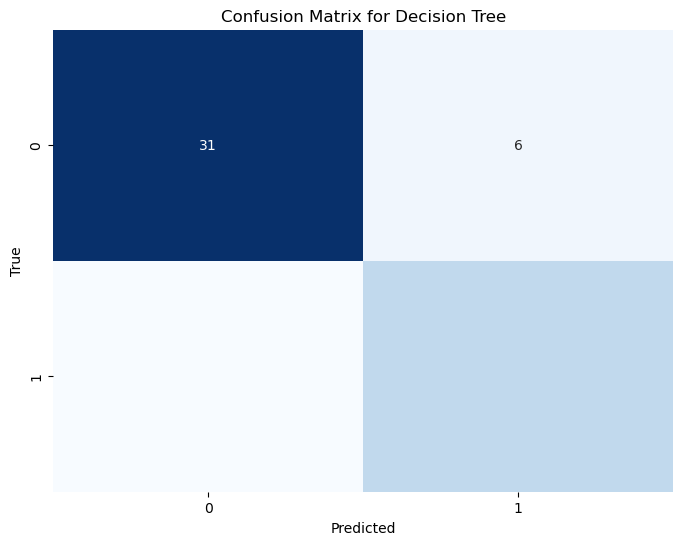

In [307]:
# Izračunavanje matrice zabune
dt_conf_matrix = confusion_matrix(y_test, dt_h)

# Ispis matrice zabune
print("Confusion Matrix:")
print(dt_conf_matrix)

# Vizualizacija matrice zabune
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


### Naive Bayes

In [308]:
nb = GaussianNB()
nb_y_pred = cross_val_predict(nb, X,  y, cv=10)

print(classification_report(y, nb_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       253
           1       0.67      0.83      0.74       119

    accuracy                           0.81       372
   macro avg       0.79      0.82      0.80       372
weighted avg       0.83      0.81      0.82       372



In [309]:
# Inicijalizacija Naive Bayes modela
naive_bayes = GaussianNB()

# Treniranje modela
naive_bayes.fit(X_train, y_train)

# Predviđanje na testnom skupu
nb_h = naive_bayes.predict(X_test)

# Evaluacija modela
nb_accuracy = accuracy_score(y_test, nb_h)
print(f"Točnost modela: {nb_accuracy:.2f}")

print(classification_report(y_test, nb_h))


Točnost modela: 0.85
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        37
           1       0.74      0.82      0.78        17

    accuracy                           0.85        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.86      0.85      0.85        54



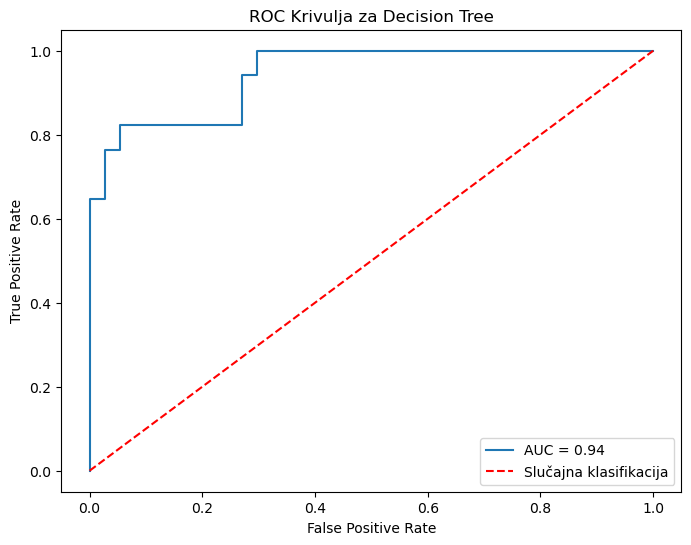

In [310]:
# Predviđanja vjerojatnosti pripadnosti pozitivnom razredu (klasi 1)
nb_y_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Izračunavanje vrijednosti ROC krivulje
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_y_proba)

# Izračunavanje AUC 
nb_auc = roc_auc_score(y_test, nb_y_proba)

# Crtanje ROC krivulje
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label=f'AUC = {nb_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Slučajna klasifikacija')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Krivulja za Decision Tree')
plt.legend()
plt.show()

Confusion Matrix:
[[32  5]
 [ 3 14]]


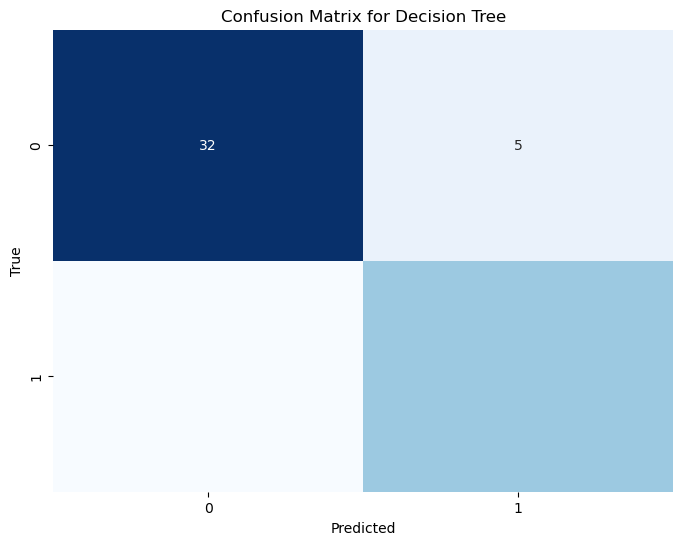

In [311]:
# Izračunavanje matrice zabune
nb_conf_matrix = confusion_matrix(y_test, nb_h)

# Ispis matrice zabune
print("Confusion Matrix:")
print(nb_conf_matrix)

# Vizualizacija matrice zabune
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


### Random Forest

In [312]:
rf = RandomForestClassifier()
rf_y_pred = cross_val_predict(rf, X,  y, cv=10)

print(classification_report(y, rf_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       253
           1       0.61      0.56      0.59       119

    accuracy                           0.75       372
   macro avg       0.71      0.70      0.70       372
weighted avg       0.74      0.75      0.74       372



In [313]:
# Inicijalizacija Random Forest modela
random_forest = RandomForestClassifier()

# Treniranje modela
random_forest.fit(X_train, y_train)

# Predviđanja na testnom skupu
rf_h = random_forest.predict(X_test)

# Ispis točnosti modela
rf_accuracy = accuracy_score(y_test, rf_h)
print(f"Točnost modela: {rf_accuracy:.2f}")

print(classification_report(y_test, rf_h))

Točnost modela: 0.83
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.72      0.76      0.74        17

    accuracy                           0.83        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.84      0.83      0.83        54



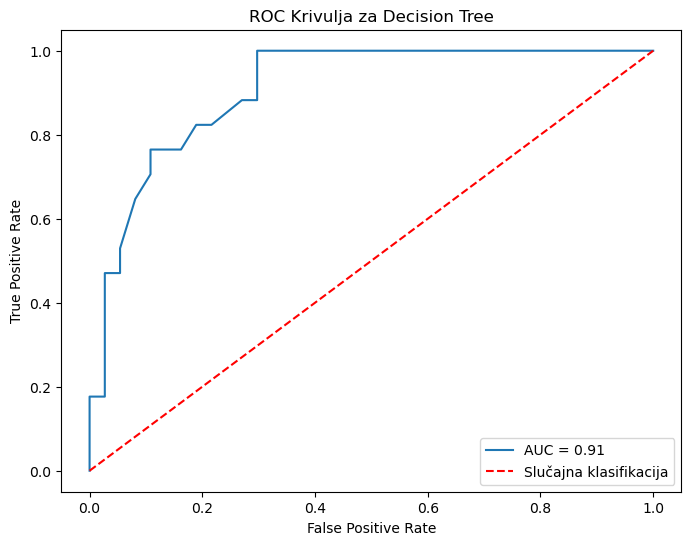

In [314]:
# Predviđanja vjerojatnosti pripadnosti pozitivnom razredu (klasi 1)
rf_y_proba = random_forest.predict_proba(X_test)[:, 1]

# Izračunavanje vrijednosti ROC krivulje
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_proba)

# Izračunavanje AUC 
rf_auc = roc_auc_score(y_test, rf_y_proba)

# Crtanje ROC krivulje
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'AUC = {rf_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Slučajna klasifikacija')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Krivulja za Decision Tree')
plt.legend()
plt.show()

Confusion Matrix:
[[32  5]
 [ 4 13]]


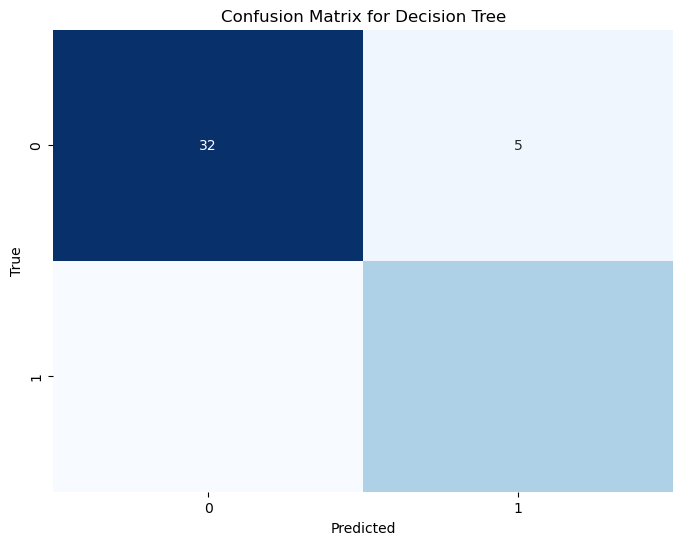

In [315]:
# Izračunavanje matrice zabune
rf_conf_matrix = confusion_matrix(y_test, rf_h)

# Ispis matrice zabune
print("Confusion Matrix:")
print(rf_conf_matrix)

# Vizualizacija matrice zabune
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


### Logistic regression

In [316]:
lr = LogisticRegression()
lr_y_pred = cross_val_predict(lr, X,  y, cv=10)

print(classification_report(y, lr_y_pred))

/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       253
           1       0.62      0.59      0.60       119

    accuracy                           0.75       372
   macro avg       0.72      0.71      0.71       372
weighted avg       0.75      0.75      0.75       372



/home/lucija/miniconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [317]:
# Inicijalizacija modela logističke regresije
logistic_regression = LogisticRegression()

# Treniranje modela
logistic_regression.fit(X_train, y_train)

# Predviđanja na testnom skupu
lr_h = logistic_regression.predict(X_test)

# Ispis točnosti modela
lr_accuracy = accuracy_score(y_test, lr_h)
print(f"Točnost modela: {lr_accuracy:.2f}")

print(classification_report(y_test, lr_h))

Točnost modela: 0.89
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.82      0.82      0.82        17

    accuracy                           0.89        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.89      0.89      0.89        54



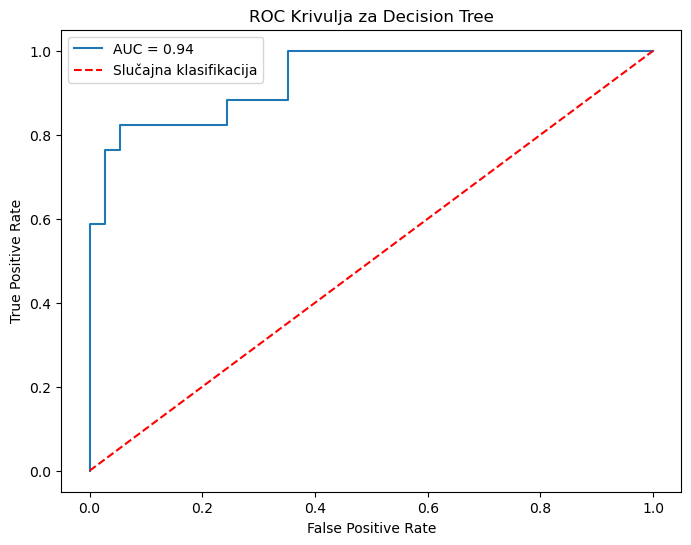

In [318]:
# Predviđanja vjerojatnosti pripadnosti pozitivnom razredu (klasi 1)
lr_y_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Izračunavanje vrijednosti ROC krivulje
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_proba)

# Izračunavanje AUC 
lr_auc = roc_auc_score(y_test, lr_y_proba)

# Crtanje ROC krivulje
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'AUC = {lr_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Slučajna klasifikacija')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Krivulja za Decision Tree')
plt.legend()
plt.show()

Confusion Matrix:
[[34  3]
 [ 3 14]]


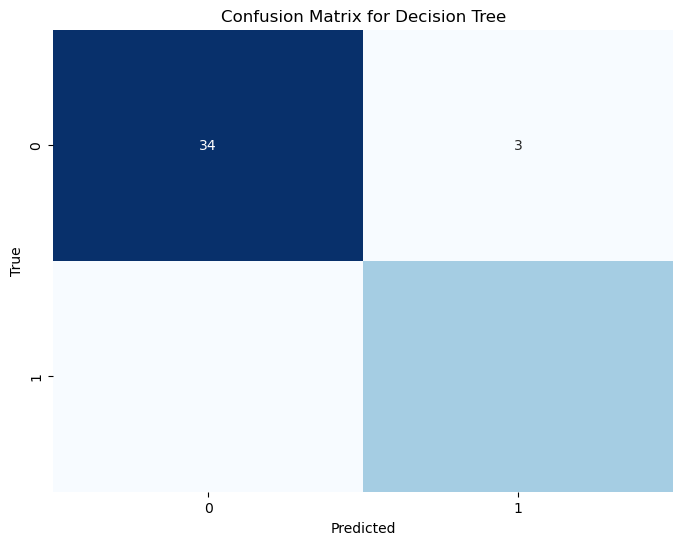

In [319]:
# Izračunavanje matrice zabune
lr_conf_matrix = confusion_matrix(y_test, lr_h)

# Ispis matrice zabune
print("Confusion Matrix:")
print(lr_conf_matrix)

# Vizualizacija zabune matrice
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


### SVM


In [320]:
svm0 = DecisionTreeClassifier()
svm_y_pred = cross_val_predict(svm0, X,  y, cv=10)

print(classification_report(y, svm_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       253
           1       0.57      0.57      0.57       119

    accuracy                           0.73       372
   macro avg       0.68      0.68      0.68       372
weighted avg       0.73      0.73      0.73       372



In [321]:
# Inicijalizacija modela SVM-a
svm = SVC(probability=True) 

# Treniranje modela
svm.fit(X_train, y_train)

# Predviđanja na testnom skupu
svm_h = svm.predict(X_test)

# Ispis točnosti modela
svm_accuracy = accuracy_score(y_test, svm_h)
print(f"Točnost modela: {svm_accuracy:.2f}")

print(classification_report(y_test, svm_h))

Točnost modela: 0.83
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        37
           1       0.72      0.76      0.74        17

    accuracy                           0.83        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.84      0.83      0.83        54



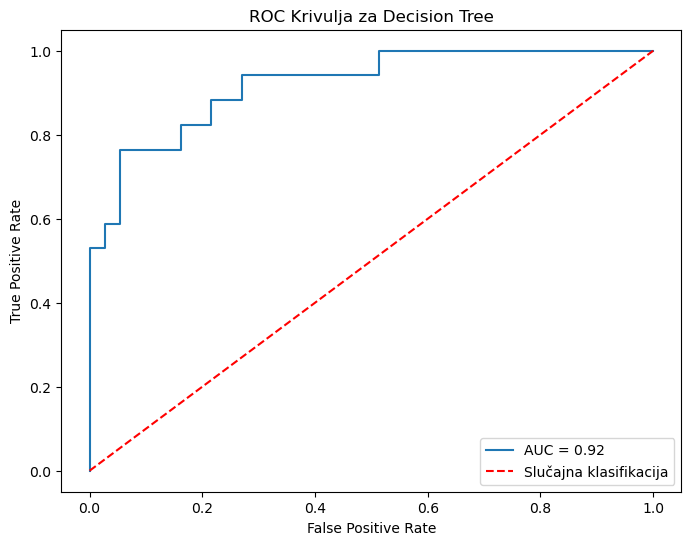

In [322]:
# Predviđanja vjerojatnosti pripadnosti pozitivnom razredu (klasi 1)
svm_y_proba = svm.predict_proba(X_test)[:, 1]

# Izračunavanje vrijednosti ROC krivulje
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_proba)

# Izračunavanje AUC 
svm_auc = roc_auc_score(y_test, svm_y_proba)

# Crtanje ROC krivulje
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'AUC = {svm_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Slučajna klasifikacija')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Krivulja za Decision Tree')
plt.legend()
plt.show()

Confusion Matrix:
[[32  5]
 [ 4 13]]


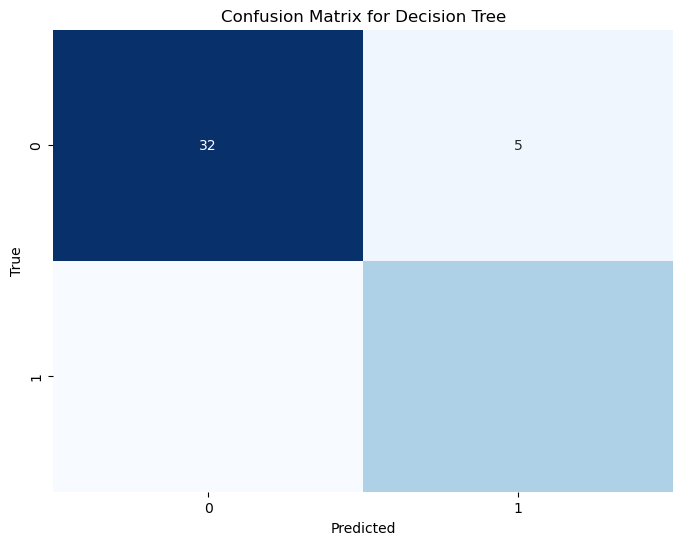

In [323]:
# Izračunavanje matrice zabune
svm_conf_matrix = confusion_matrix(y_test, svm_h)

# Ispis matrice zabune
print("Confusion Matrix:")
print(svm_conf_matrix)

# Vizualizacija matrice zabune
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


### Usporedba točnosti modela


In [324]:
print(f"Točnost modela Decision Tree: {dt_h_accuracy:.2f}")
print(f"Točnost modela Naive Bayes: {nb_accuracy:.2f}")
print(f"Točnost modela Random Forest: {rf_accuracy:.2f}")
print(f"Točnost modela Logistic regression: {lr_accuracy:.2f}")
print(f"Točnost SVM modela: {svm_accuracy:.2f}")


Točnost modela Decision Tree: 0.80
Točnost modela Naive Bayes: 0.85
Točnost modela Random Forest: 0.83
Točnost modela Logistic regression: 0.89
Točnost SVM modela: 0.83
